# EDA on Google's play store Apps

**Author Name:** Syed Ghazi Ali Zaidi \
**Email:** sghazializaidi@gmail.com

The data was downloaded from [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps)

## *The data collected from the source has the following description:*

## About the Dataset

### Context
While numerous public datasets, such as those on Kaggle, provide Apple App Store data, equivalent datasets for Google Play Store apps are scarce across the web. Upon closer examination, it becomes evident that the iTunes App Store employs a well-organized, index-like structure, facilitating straightforward web scraping. In contrast, the Google Play Store utilizes sophisticated, modern techniques, including dynamic page loading with JQuery, presenting a more challenging environment for scraping.

### Content
Each entry in the dataset represents an app, featuring information such as category, rating, size, and more.

### Acknowledgements
The data presented here has been scraped from the Google Play Store. This valuable app information would not be accessible without the efforts involved in scraping.

### Inspiration
The dataset containing information on Play Store apps holds immense potential for guiding app development businesses toward success. Developers can extract actionable insights to target specific areas and capitalize on opportunities within the Android market!

# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Data Loading and Exploration | Cleaning

- let's load the csv

In [2]:
df = pd.read_csv('./Datasets/googleplaystore.csv')

- Important code to run

In [3]:
# Set options to be maximum for rows and columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# hide all warnings
import warnings 
warnings.filterwarnings('ignore')

- Looking at first 5 rows

In [4]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.")

There are 10840 rows and 13 columns in the dataset.


In [6]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


- To check which columns are numeric

In [8]:
df.describe()

,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


#### We analyzed that there must be 5 columns that are numeric, but we have 2

In [9]:
df[['Size','Installs','Price']].sample(5)

,Size,Installs,Price
1667,75M,"100,000,000+",0
9793,2.8M,"100,000+",0
9420,1.5M,100+,0
7036,5.6M,"100,000+",0
2999,35M,"5,000,000+",0


# Making columns numeric

# 1. Size

In [10]:
df['Size'].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
26M                    149
16M                    149
25M                    143
20M                    139
21M                    138
10M                    136
24M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.5M                    68
2.3M                    68
2.8M                    65
3.4M                    65
32M                     63
34M                     63
3.7M                    63
40M                     62
3.9M                   

Observations:
1. Varies with device
2. M 
3. K

- We will remove `Varies with device` with `NAN`
- Remove M
- Remove k and dividing it by 1024

In [11]:
df['Size'].isna().sum()

0

In [12]:
# Sum of Varies with device available in Size column
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1695

In [13]:
# Sum of M available in Size column
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8829

In [14]:
# Sum of k available in Size column
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

316

In [15]:
df['Size'].value_counts().sum()

10840

#### Removing `Varies with device` with numpy NAN

In [16]:
df['Size'] = df['Size'].replace('Varies with device',np.nan)

In [17]:
df['Size'].isnull().sum()

1695

#### Replacing `M` with empty space

In [18]:
df['Size'] = df['Size'].str.replace('M','')

### Making function to handle `K` and divide it by 1024

In [19]:
def covert_k(size):
    if isinstance(size,str):
        if 'k' in size:
            return float(size.replace('k',"")) / 1024
    return size

- Calling the function

In [20]:
df['Size'] = df['Size'].apply(covert_k)
df['Size'].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '2.7', '5.5', '17', '39', '31', '4.2',
       '7.0', '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24', nan,
       '9.4', '15', '10', '1.2', '26', '8.0', '7.9', '56', '57', '35',
       '54', 0.1962890625, '3.6', '5.7', '8.6', '2.4', '27', '2.5', '16',
       '3.4', '8.9', '3.9', '2.9', '38', '32', '5.4', '18', '1.1', '2.2',
       '4.5', '9.8', '52', '9.0', '6.7', '30', '2.6', '7.1', '3.7', '22',
       '7.4', '6.4', '3.2', '8.2', '9.9', '4.9', '9.5', '5.0', '5.9',
       '13', '73', '6.8', '3.5', '4.0', '2.3', '7.2', '2.1', '42', '7.3',
       '9.1', '55', 0.0224609375, '6.5', '1.5', '7.5', '51', '41', '48',
       '8.5', '46', '8.3', '4.3', '4.7', '3.3', '40', '7.8', '8.8', '6.6',
       '5.1', '61', '66', 0.0771484375, '8.4', 0.115234375, '44',
       0.6787109375, '1.6', '6.2', 0.017578125, '53', '1.4', '3.0', '5.8',
       '3.8', '9.6', '45', '63', '49', '77', '4.4', '4.8', '7

In [21]:
df['Size'] = df['Size'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


# 2. Installs

In [22]:
df['Installs'].sample(5)

10365           100+
9436      1,000,000+
1851     50,000,000+
2366        100,000+
43          100,000+
Name: Installs, dtype: object

**Observations:**
1. Remove `+`
2. Remove `,`
3. Convert astype to int64

In [23]:
df['Installs'] = df['Installs'].str.replace('+','')
df['Installs'] = df['Installs'].str.replace(',','')
df['Installs'] = df['Installs'].astype('int64')
df['Installs'].sample(10)

10164       1000
7146       50000
4023      100000
8160         500
8697       50000
285      5000000
3023      100000
7311          10
7294         100
7813     5000000
Name: Installs, dtype: int64

# 3. Price

In [24]:
df['Price'].sample(5)

8757     0
620      0
1489     0
10414    0
6234     0
Name: Price, dtype: object

## **Observations:**
#### 1. `$` sign is what causing the issue, we need to remove it

In [25]:
df['Price'] = df['Price'].str.replace('$','')
df['Price'] = df['Price'].astype('float64')

### 3 Columns are successfully converted to numeric

In [26]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,21.516165,1.546434e+07,1.027368
std,0.515219,2.927761e+06,22.589084,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,4.900000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,30.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


# Handling Missing Values

### Checking the count of missing values in the data

In [27]:
#Finding the missing values
df.isnull().sum().sort_values(ascending=False)

Size              1695
Rating            1474
Current Ver          8
Android Ver          2
Type                 1
App                  0
Category             0
Reviews              0
Installs             0
Price                0
Content Rating       0
Genres               0
Last Updated         0
dtype: int64

In [28]:
# Finding the percentage of missing values
df.isnull().sum().sum() / len(df) * 100

29.335793357933582

<Axes: >

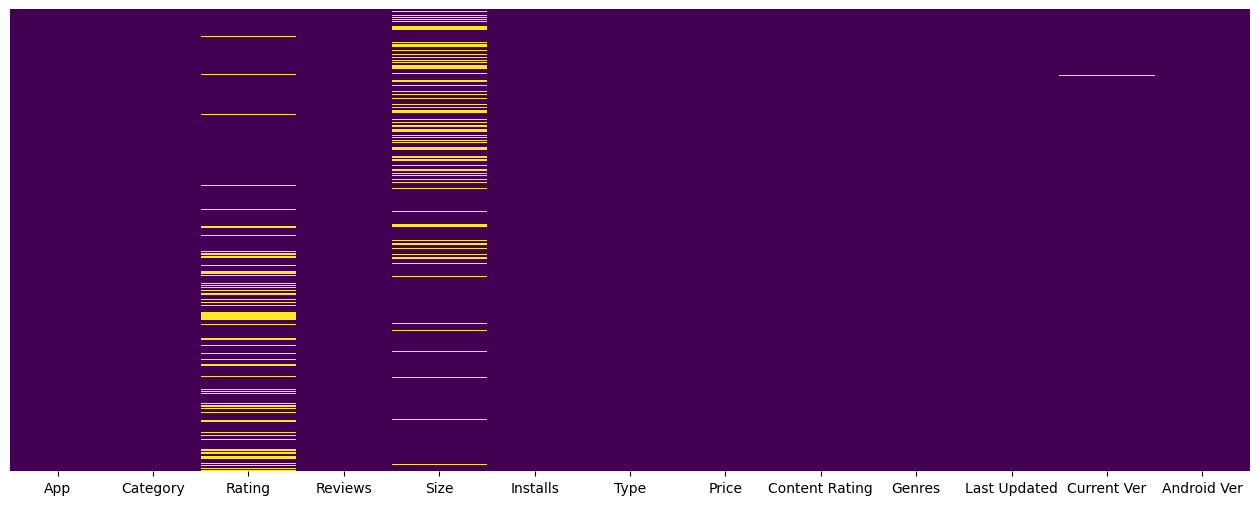

In [29]:
# Heat map to analyse the missing values
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

## Bar chart to show the missing values in column

Text(0.5, 1.0, 'Percentage of Missing values in each column')

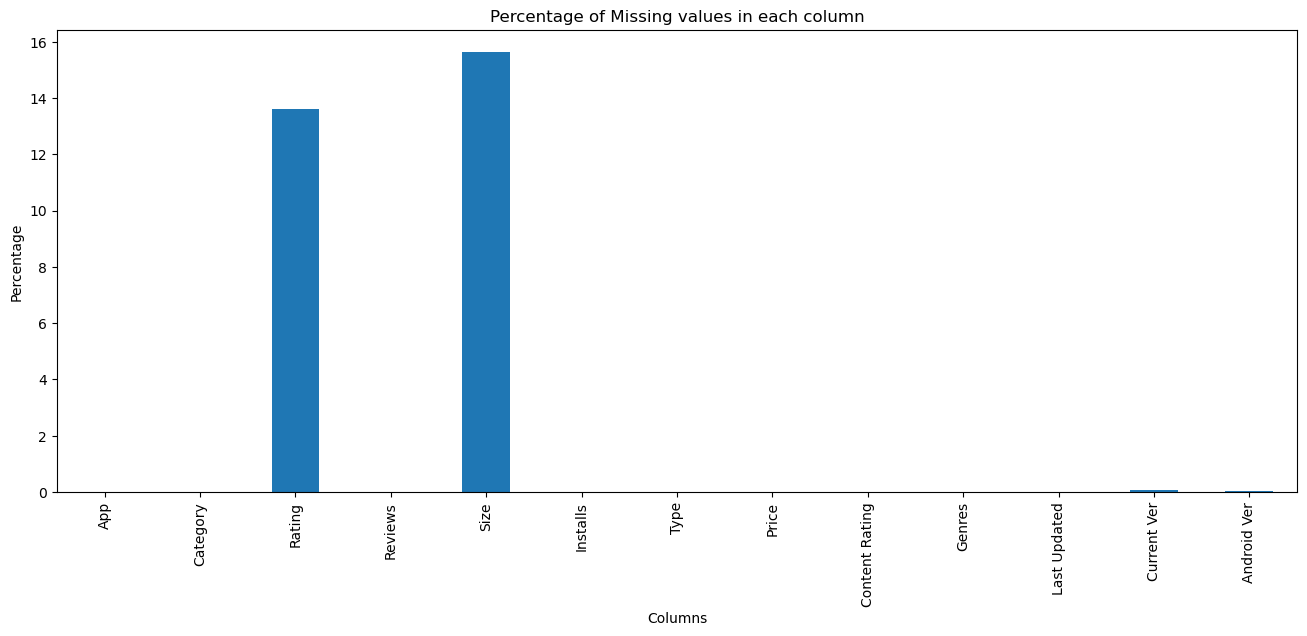

In [30]:
# figure size
plt.figure(figsize=(16,6))

# plot the null values by their percentage in each column
missing_column_percentage = df.isnull().sum() / len(df) * 100
missing_column_percentage.plot(kind='bar')

# Labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing values in each column')

### Visualization of missing values below 1% in the dataset

<Axes: >

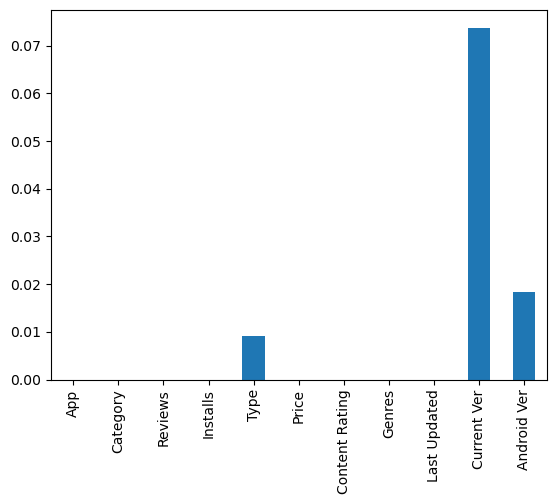

In [31]:
missing_column_percentage[missing_column_percentage < 1].plot(kind='bar')